In [1]:

!pip install transformers
!pip install torch
!pip install pandas
!pip install scikit-learn
!pip install evaluate
!pip install nltk
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.8/31.8 MB 27.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 9.3 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 12.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 24.8 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [17]:
#had to modify the bleu loop for nllb as one file is empty
#kept on giving errors
import os
import csv
from evaluate import load

bleu = load("bleu")

input_dir = "/work/Exam/nllb_renamed/" 
reference_dir = "/work/Exam/reference_tales/jz/" #xchange to mh for other references
output_csv_bleu = "/work/Exam/Scores/bleu_nllb_jz.csv"


headers = [
    "File", "BLEU", "Precisions", "Brevity Penalty", 
    "Length Ratio", "Translation Length", "Reference Length"
]
with open(output_csv_bleu, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(headers)

# extract prfix of filename
def extract_number(filename):
    return filename.split('_')[0]

for filename in os.listdir(input_dir):
    if filename.endswith(".txt"):
        file_number = extract_number(filename)
        
        # Find matching reference file
        reference_file = None
        for ref_filename in os.listdir(reference_dir):
            if ref_filename.startswith(file_number):
                reference_file = os.path.join(reference_dir, ref_filename)
                break
        
        if not reference_file:
            print(f"No matching reference file found for {filename}. Skipping...") #for that one file
            continue

        translated_file = os.path.join(input_dir, filename)
        with open(translated_file, "r", encoding="utf-8") as file:
            translated_text = file.read().strip()
        with open(reference_file, "r", encoding="utf-8") as file:
            reference_text = file.read().strip()

        # Handle empty files
        if not translated_text or not reference_text:
            print(f"Empty file detected: {filename}. Assigning BLEU = 0.")
            bleu_score = 0.0
            precisions = [0.0, 0.0, 0.0, 0.0]
            brevity_penalty = 0.0
            length_ratio = 0.0
            translation_length = 0
            reference_length = 0
        else:
            # Compute BLEU
            results = bleu.compute(predictions=[translated_text], references=[[reference_text]])
            bleu_score = results["bleu"]
            precisions = results["precisions"]
            brevity_penalty = results["brevity_penalty"]
            length_ratio = results["length_ratio"]
            translation_length = results["translation_length"]
            reference_length = results["reference_length"]

        #CSV
        with open(output_csv_bleu, mode='a', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
            writer.writerow([
                filename, bleu_score, precisions, brevity_penalty, 
                length_ratio, translation_length, reference_length
            ])

        print(f"BLEU Score for {filename} saved.")



BLEU Score for 21_cinderella.txt saved.
BLEU Score for 134_the_six_servants.txt saved.
BLEU Score for 201_heavenly_wedding.txt saved.
BLEU Score for 200_the_golden_key.txt saved.
BLEU Score for 41_herr_korbes.txt saved.
BLEU Score for 17_the_white_snake.txt saved.
BLEU Score for 111_The_Skilful_Huntsman.txt saved.
BLEU Score for 86_the_fox_and_the_geese.txt saved.
BLEU Score for 15_hansel_and_grethel.txt saved.
BLEU Score for 135_the_white_bride_and_the_black_.txt saved.
BLEU Score for 131_Fair_Katrinelje_and_Pif-Paf-Po.txt saved.
BLEU Score for 94_The_Peasant’s_Wise_Daughter.txt saved.
BLEU Score for 98_doctor_knowall.txt saved.
BLEU Score for 123_the_old_woman_in_the_wood.txt saved.
BLEU Score for 138_knoist_and_his_three_sons.txt saved.
BLEU Score for 157_the_sparrow_and_his_four_child.txt saved.
BLEU Score for 65_Allerleirauh.txt saved.
BLEU Score for 36_The_Wishing-Table,_the_Gold-As.txt saved.
BLEU Score for 146_the_turnip.txt saved.
BLEU Score for 23_The_Mouse,_the_Bird,_and_the

In [10]:
import os
import csv
from evaluate import load

# Load BLEU evaluator
bleu = load("bleu")

input_dir = "/work/Exam/llama__score" 
reference_dir = "/work/Exam/reference_tales/mh/" #change to jz for other references
output_csv_bleu = "/work/Exam/Scores/bleu_llama_mh.csv" #change


headers = [
    "File", "BLEU", "Precisions", "Brevity Penalty", 
    "Length Ratio", "Translation Length", "Reference Length"
]
with open(output_csv_bleu, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(headers)

def extract_number(filename):
    return filename.split('_')[0]

# Compute BLEU Score
for filename in os.listdir(input_dir):
    if filename.endswith(".txt"):
        file_number = extract_number(filename)
        
        reference_file = None
        for ref_filename in os.listdir(reference_dir):
            if ref_filename.startswith(file_number):
                reference_file = os.path.join(reference_dir, ref_filename)
                break
        
        if not reference_file:
            print(f"No matching reference file found for {filename}. Skipping...")
            continue

        translated_file = os.path.join(input_dir, filename)
        with open(translated_file, "r", encoding="utf-8") as file:
            translated_text = file.read().strip()
        with open(reference_file, "r", encoding="utf-8") as file:
            reference_text = file.read().strip()

        # Compute BLEU
        results = bleu.compute(predictions=[translated_text], references=[[reference_text]])
        bleu_score = results["bleu"]
        precisions = results["precisions"]
        brevity_penalty = results["brevity_penalty"]
        length_ratio = results["length_ratio"]
        translation_length = results["translation_length"]
        reference_length = results["reference_length"]

        # CSV
        with open(output_csv_bleu, mode='a', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
            writer.writerow([
                filename, bleu_score, precisions, brevity_penalty, 
                length_ratio, translation_length, reference_length
            ])

        print(f"BLEU Score for {filename} saved.")

BLEU Score for 157_Der_Sperling_und_seine_vier_Ki_en(1).txt saved.
BLEU Score for 2_Katze_und_Maus_in_Gesellschaft_en(1).txt saved.
BLEU Score for 55_Rumpelstilzchen_en(1).txt saved.
BLEU Score for 105_Märchen_von_der_Unke_en.txt saved.
BLEU Score for 42_Der_Herr_Gevatter_en(1).txt saved.
BLEU Score for 86_Der_Fuchs_und_die_G_nse_en.txt saved.
BLEU Score for 23_Von_dem_M_uschen,_V_gelchen_un_en(1).txt saved.
BLEU Score for 76_Die_Nelke_en.txt saved.
BLEU Score for 94_Die_kluge_Bauerntochter_en.txt saved.
BLEU Score for 80_Von_dem_Tode_des_H_hnchens_en(1).txt saved.
BLEU Score for 26_Rothk_ppchen_en(1).txt saved.
BLEU Score for 118_Die_drei_Feldscherer_en(1).txt saved.
BLEU Score for 138_Knoist_un_sine_dre_S_hne_en(1).txt saved.
BLEU Score for 120_Die_drei_Handwerksburschen_en.txt saved.
BLEU Score for 146_Die_R_be_en(1).txt saved.
BLEU Score for 41_Herr_Korbes_en(1).txt saved.
BLEU Score for 135_Die_wei_e_und_die_schwarze_Bra_en(1).txt saved.
BLEU Score for 53_Sneewittchen_en(1).txt sa

### NLLB BLEU plots - mean of both

In [19]:
import pandas as pd

# Load the two CSV files
file_path_ref1 = "/work/FrederiekeNicolaWullf#7811/Exam/Scores/bleu_nllb_jz.csv"  # Jack Zipes
file_path_ref2 = "/work/FrederiekeNicolaWullf#7811/Exam/Scores/bleu_nllb_mh.csv"  # Margaret Hunt

# Load data
data_ref1 = pd.read_csv(file_path_ref1)
data_ref2 = pd.read_csv(file_path_ref2)

# Extract numeric prefixes to identify matching files
data_ref1['Numeric Prefix'] = data_ref1['File'].str.extract(r'^(\d+)').astype(int)
data_ref2['Numeric Prefix'] = data_ref2['File'].str.extract(r'^(\d+)').astype(int)

# Check if 'BLEU' is already numerical, if not, convert it
if data_ref1['BLEU'].dtype == 'object':
    data_ref1['BLEU'] = data_ref1['BLEU'].apply(lambda x: eval(x)[0] if isinstance(x, str) else x)

if data_ref2['BLEU'].dtype == 'object':
    data_ref2['BLEU'] = data_ref2['BLEU'].apply(lambda x: eval(x)[0] if isinstance(x, str) else x)

# Merge the two dataframes on the numeric prefix
merged_data = pd.merge(data_ref1, data_ref2, on='Numeric Prefix', suffixes=('_Ref1', '_Ref2'))

# Calculate the mean BLEU score
merged_data['Mean BLEU'] = merged_data[['BLEU_Ref1', 'BLEU_Ref2']].mean(axis=1)

# Clean filenames in the merged DataFrame
merged_data['File'] = merged_data['File_Ref1'].str.replace('_', ' ').str.replace('.txt', '').str.replace('(1)', '').str.replace(' en', '')

# Sort by numeric prefix
merged_data_nllb = merged_data.sort_values(by='Numeric Prefix')

# Final DataFrame
print(merged_data_nllb[['File', 'BLEU_Ref1', 'BLEU_Ref2', 'Mean BLEU']])


                                  File  BLEU_Ref1  BLEU_Ref2  Mean BLEU
63      1 the frog-king, or iron henry   0.023530   0.034745   0.029137
37      2 Cat and Mouse in Partnership   0.003212   0.018189   0.010701
48                  3 Our Lady’s Child   0.040514   0.007792   0.024153
45    5 the wolf and the seven little    0.030560   0.005551   0.018056
62               9 the twelve brothers   0.044322   0.028030   0.036176
..                                 ...        ...        ...        ...
15  157 the sparrow and his four child   0.045581   0.064619   0.055100
56  158 The Story of Schlauraffen Land   0.221175   0.210636   0.215906
58   159 The Ditmarsch Tale of Wonders   0.239237   0.288683   0.263960
3                   200 the golden key   0.196539   0.225005   0.210772
2                 201 heavenly wedding   0.245714   0.241933   0.243824

[112 rows x 4 columns]


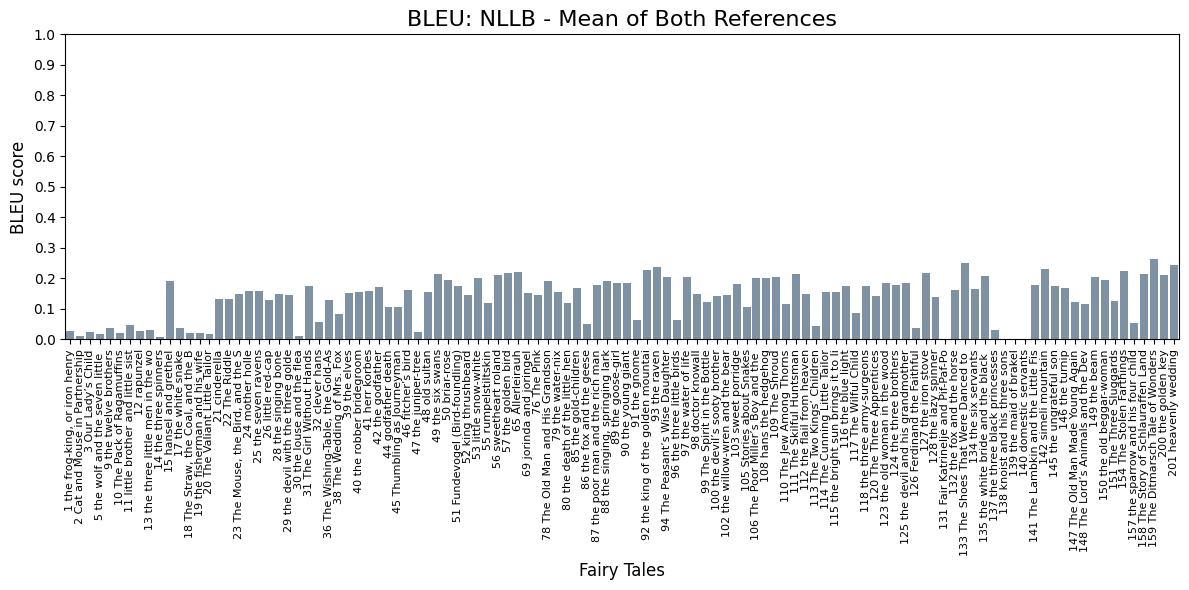

In [20]:
#plotting nllb mh
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Use the already merged DataFrame
data = merged_data_nllb.copy()  # Make a copy to ensure no accidental changes


# Clean up the 'File' column
data['File'] = data['File'].str.replace('_', ' ').str.replace('.txt', '').str.replace('(1)', '').str.replace(' en', '')

# Sort by Numeric Prefix
data = data.sort_values(by='Numeric Prefix')

# Plot using 'Mean F1 Score'
plt.figure(figsize=(12, 6))
sns.barplot(x='File', y='Mean BLEU', data=data, color='#7992AA')  # Use 'Mean F1 Score' instead of 'F1 Score'

plt.xticks(rotation=90, ha='center', fontsize=8)
plt.title('BLEU: NLLB - Mean of Both References', fontsize=16)
plt.xlabel('Fairy Tales', fontsize=12)
plt.ylabel('BLEU score', fontsize=12)
plt.ylim(0, 1)

# Set y-axis ticks at intervals of 0.1
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=11))


plt.tight_layout()
plt.show()

### Using the Mean of Both BLEU scores for the plot - LLaMA

In [11]:
import pandas as pd

file_path_ref1 = "/work/FrederiekeNicolaWullf#7811/Exam/Scores/bleu_llama_jz.csv"  # Jack Zipes
file_path_ref2 = "/work/FrederiekeNicolaWullf#7811/Exam/Scores/bleu_llama_mh.csv"  # Margaret Hunt

data_ref1 = pd.read_csv(file_path_ref1)
data_ref2 = pd.read_csv(file_path_ref2)

# Extract numeric prefixes to identify matching files
data_ref1['Numeric Prefix'] = data_ref1['File'].str.extract(r'^(\d+)').astype(int)
data_ref2['Numeric Prefix'] = data_ref2['File'].str.extract(r'^(\d+)').astype(int)

# If'BLEU' is already numerical, if not, convert it, was an issue....
if data_ref1['BLEU'].dtype == 'object':
    data_ref1['BLEU'] = data_ref1['BLEU'].apply(lambda x: eval(x)[0] if isinstance(x, str) else x)

if data_ref2['BLEU'].dtype == 'object':
    data_ref2['BLEU'] = data_ref2['BLEU'].apply(lambda x: eval(x)[0] if isinstance(x, str) else x)

merged_data = pd.merge(data_ref1, data_ref2, on='Numeric Prefix', suffixes=('_Ref1', '_Ref2'))

# Calculate the mean BLEU score
merged_data['Mean BLEU'] = merged_data[['BLEU_Ref1', 'BLEU_Ref2']].mean(axis=1)
merged_data['File'] = merged_data['File_Ref1'].str.replace('_', ' ').str.replace('.txt', '').str.replace('(1)', '').str.replace(' en', '')

# Sort by numeric prefix for the plot 
merged_data_llama = merged_data.sort_values(by='Numeric Prefix')

#get a look at dataframe
print(merged_data_llama[['File', 'BLEU_Ref1', 'BLEU_Ref2', 'Mean BLEU']])


                                  File  BLEU_Ref1  BLEU_Ref2  Mean BLEU
40    1 Der Froschk nig oder der eiser   0.038468   0.046433   0.042450
1     2 Katze und Maus in Gesellschaft   0.005947   0.000000   0.002973
90                        3 Marienkind   0.040270   0.000000   0.020135
98    5 Der Wolf und die sieben jungen   0.033739   0.011854   0.022797
85                  9 Die zw lf Br der   0.064763   0.046649   0.055706
..                                 ...        ...        ...        ...
0   157 Der Sperling und seine vier Ki   0.183214   0.154150   0.168682
46  158 Das M rchen vom Schlauraffenla   0.392076   0.286993   0.339535
20  159 Das Dietmarsische L genm rchen   0.397972   0.435295   0.416634
71           200 Der goldene Schl ssel   0.246892   0.309194   0.278043
51                201 heavenly wedding   0.297089   0.252731   0.274910

[115 rows x 4 columns]


/tmp/ipykernel_3860/1408861631.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['File'] = data['File'].str.replace('_', ' ').str.replace('.txt', '').str.replace('(1)', '').str.replace(' en', '')


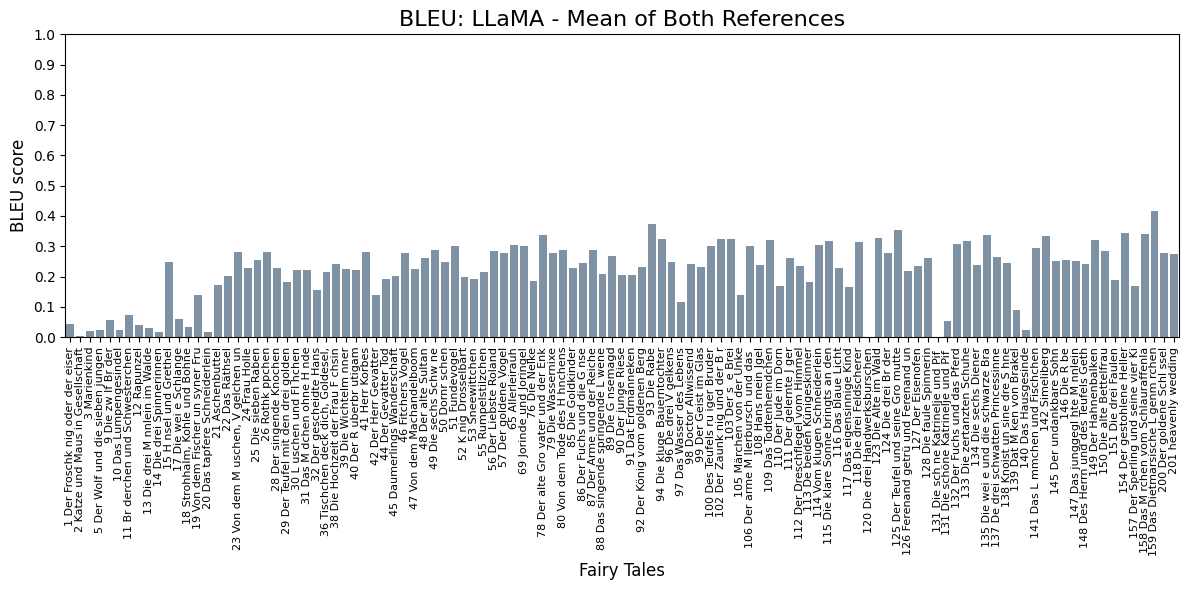

In [16]:
#plotting nllb mh
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

data = merged_data_llama.copy()  # Make a copy to ensure no accidental changes

data = merged_data_llama.drop_duplicates(subset='File')


# Clean up the 'File' column
data['File'] = data['File'].str.replace('_', ' ').str.replace('.txt', '').str.replace('(1)', '').str.replace(' en', '')

# Sort by Numeric Prefix
data = data.sort_values(by='Numeric Prefix')

# Plot using 'Mean F1 Score'
plt.figure(figsize=(12, 6))
sns.barplot(x='File', y='Mean BLEU', data=data, color='#7992AA')  # Use 'Mean F1 Score' instead of 'F1 Score'

plt.xticks(rotation=90, ha='center', fontsize=8)
plt.title('BLEU: LLaMA - Mean of Both References', fontsize=16)
plt.xlabel('Fairy Tales', fontsize=12)
plt.ylabel('BLEU score', fontsize=12)
plt.ylim(0, 1)

# Set y-axis ticks at intervals of 0.1
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=11))


plt.tight_layout()
plt.show()

In [26]:
#mean for nllb jz
import pandas as pd

file_path = "/work/Exam/Scores/bleu_nllb_jz.csv"  # Change
nllb_jz = pd.read_csv(file_path)
mean_jz = nllb_jz['BLEU'].mean()

print(f"Mean BLEU Score nllb jz: {mean_jz:.4f}")

Mean BLEU Score nllb jz: 0.1115


In [27]:
#mean for nllb jz
import pandas as pd

file_path = "/work/Exam/Scores/bleu_nllb_mh.csv"  # Change
nllb_mh = pd.read_csv(file_path)
mean_mh = nllb_mh['BLEU'].mean()

print(f"Mean BLEU Score nllb mh: {mean_mh:.4f}")

Mean BLEU Score nllb mh: 0.1591


In [28]:
#mean for llama jz
import pandas as pd

file_path = "/work/Exam/Scores/bleu_llama_jz.csv"  # Change
llama_jz = pd.read_csv(file_path)
mean_jz = llama_jz['BLEU'].mean()

print(f"Mean BLEU Score llama jz: {mean_jz:.4f}")

Mean BLEU Score llama jz: 0.1920


In [30]:
#mean for llama mh
import pandas as pd

file_path = "/work/Exam/Scores/bleu_llama_mh.csv"  # Change
llama_mh = pd.read_csv(file_path)
mean_mh = llama_mh['BLEU'].mean()

print(f"Mean BLEU Score llama mh: {mean_mh:.4f}")

Mean BLEU Score llama mh: 0.2473
